# *Market Segmentation steps for MCDONALDS case study*

Importing libraries


In [96]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

drive.mount('/content/drive')

mcdonalds = pd.read_csv("/content/drive/MyDrive/mcdonalds.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
print(mcdonalds.shape,"\n")

print(mcdonalds.columns,"\n")

print(mcdonalds.head(3))


(1453, 15) 

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object') 

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [98]:
MD_x = mcdonalds.iloc[:, 0:11].copy()
MD_x = (MD_x == "Yes").astype(int)
print(MD_x.mean().round(2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [99]:
pca = PCA()
pca.fit(MD_x)

print("Explained variance ratio:")
print(pca.explained_variance_ratio_)
print("Cumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))
print("Factor loadings:")
print(pca.components_.T.round(1))


Explained variance ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative explained variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]
Factor loadings:
[[-0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.   0.6 -0.1  0. ]
 [-0.2  0.  -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.  -0.7 -0.5]
 [-0.   0.  -0.   0.2  0.1 -0.4  0.7  0.4  0.4 -0.1  0.1]
 [ 0.1 -0.  -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2 -0.   0.3]
 [ 0.3 -0.1 -0.8  0.3  0.4  0.2  0.  -0.1 -0.   0.   0. ]
 [-0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2  0.2  0.3]
 [-0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.   0.1  0.1  0.4 -0.5]
 [-0.5  0.3 -0.3 -0.  -0.2 -0.1  0.4 -0.1 -0.6  0.1  0. ]
 [ 0.3  0.6  0.   0.1 -0.  -0.3 -0.1  0.   0.1  0.5 -0.5]
 [-0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2 -0.   0.2]
 [ 0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.  -0.2 -0.1 -0.3 -0. ]]


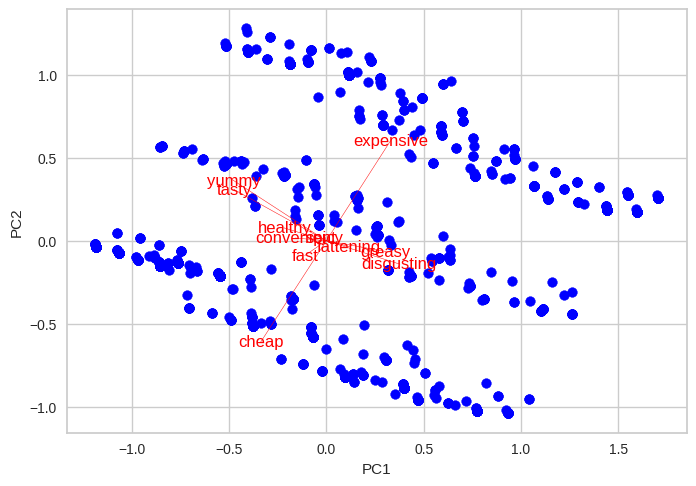

In [100]:
projected_data = pca.transform(MD_x)
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='blue')

for i, var in enumerate(MD_x.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)
    plt.text(pca.components_[0, i], pca.components_[1, i], var, color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

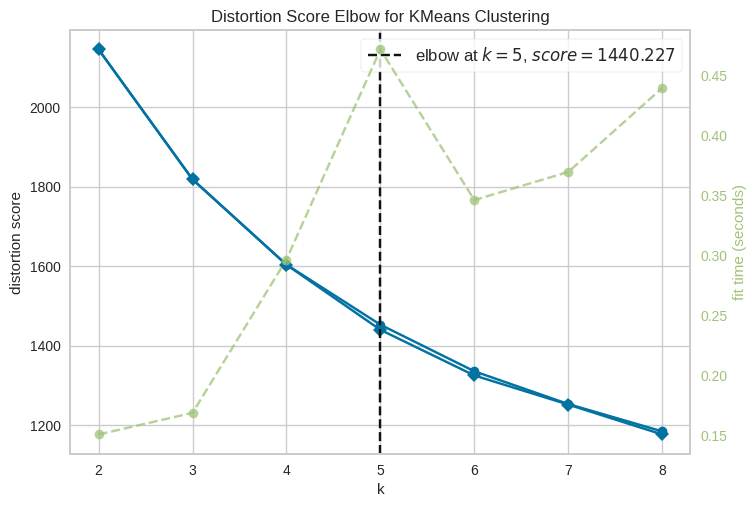

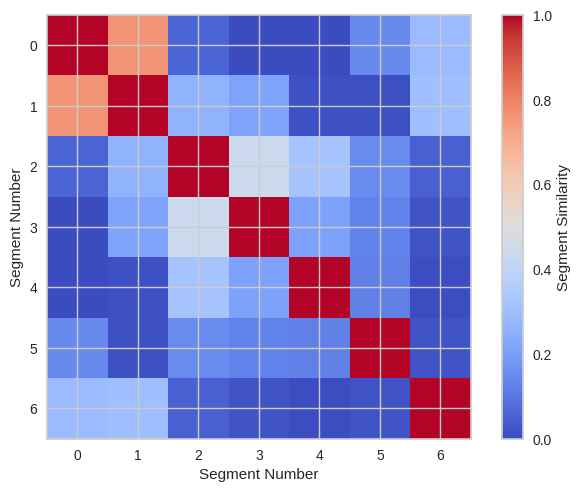

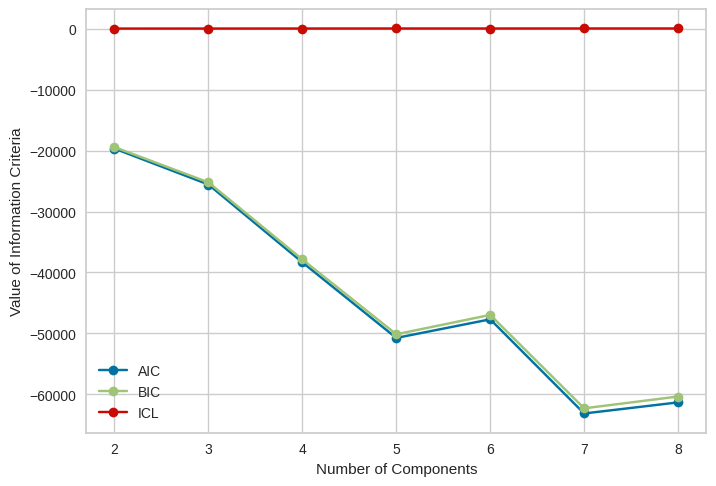

Cross-Tabulation of Segment Memberships:
[[ 69  45 251   1]
 [  2 217 277  17]
 [ 44  15   0 273]
 [234   4   0   4]]


In [101]:

#Extracting Segments - Using k-Means

np.random.seed(1234)

# Perform k-means analysis
k_range = range(2, 9)
n_rep = 10
kmeans_models = []
kmeans_labels = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=n_rep)
    kmeans.fit(MD_x)
    kmeans_models.append(kmeans)
    kmeans_labels.append(kmeans.labels_)

# Relabel segment numbers for consistency
def relabel_segments(labels):
    unique_labels = np.unique(labels)
    relabeled_labels = np.zeros_like(labels)
    for i, label in enumerate(unique_labels):
        relabeled_labels[labels == label] = i
    return relabeled_labels

kmeans_labels = [relabel_segments(labels) for labels in kmeans_labels]

# Scree plot
plt.plot(k_range, [model.inertia_ for model in kmeans_models], marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of within cluster distances')
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 9))
visualizer.fit(MD_x)
visualizer.show()

plt.show()

n_boot = 100
bootstrap_samples = np.zeros((n_boot, len(k_range)))
segment_stability = np.zeros((len(k_range), len(k_range)))

for i, labels_i in enumerate(kmeans_labels):
    for j, labels_j in enumerate(kmeans_labels):
        segment_stability[i, j] = np.mean(labels_i == labels_j)

plt.imshow(segment_stability, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar(label='Segment Similarity')
plt.xlabel('Segment Number')
plt.ylabel('Segment Number')
plt.show()

# Select the four-segment solution from k-means
selected_k = 4
selected_kmeans_labels = kmeans_labels[selected_k - 2]

# Step 5: Extracting Segments - Using Mixtures of Distributions

np.random.seed(1234)

# Perform latent class analysis using mixture of binary distributions
mixture_models = []
mixture_labels = []

for k in k_range:
    mixture_model = GaussianMixture(n_components=k, n_init=n_rep, covariance_type='diag')
    mixture_model.fit(MD_x)
    mixture_models.append(mixture_model)
    mixture_labels.append(mixture_model.predict(MD_x))

# Plot information criteria
aic_values = [model.aic(MD_x) for model in mixture_models]
bic_values = [model.bic(MD_x) for model in mixture_models]
icl_values = [model.lower_bound_ for model in mixture_models]

plt.plot(k_range, aic_values, marker='o', label='AIC')
plt.plot(k_range, bic_values, marker='o', label='BIC')
plt.plot(k_range, icl_values, marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.show()

# Select the four-segment solution from mixture models
selected_mixture_labels = mixture_labels[selected_k - 2]

# Comparing k-means and mixture model solutions
kmeans_clusters = selected_kmeans_labels
mixture_clusters = selected_mixture_labels
# Cross-tabulate segment memberships
cross_tab = np.zeros((selected_k, selected_k), dtype=int)

for i in range(selected_k):
    for j in range(selected_k):
        cross_tab[i, j] = np.sum(np.logical_and(kmeans_clusters == i, mixture_clusters == j))

print('Cross-Tabulation of Segment Memberships:')
print(cross_tab)


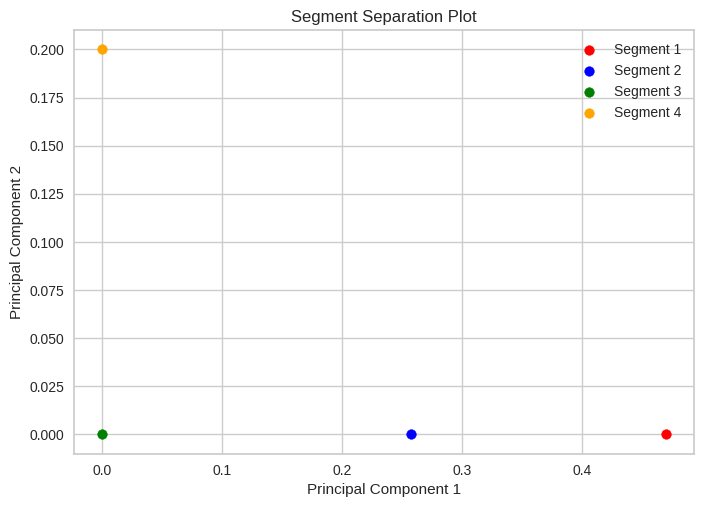

In [102]:

# Data
perceptions = ['yummy', 'tasty', 'cheap', 'fattening', 'convenient', 'fast', 'spicy', 'healthy', 'greasy', 'expensive', 'disgusting']
segments = np.array([
    [0.470, 0.000, 0.200, 0.400, 0.600, 0.800, 1.000, 0.324, 0.402],
    [0.257, 0.000, 0.200, 0.400, 0.600, 0.800, 1.000, 0.470, 0.324],
    [0.000, 0.000, 0.200, 0.400, 0.600, 0.800, 1.000, 0.402, 0.257],
    [0.000, 0.200, 0.400, 0.600, 0.800, 1.000, 0.324, 0.470, 0.402]
])

# Hierarchical clustering
dist_matrix = pdist(segments.T)  # Transpose the segments array
hierarchy = linkage(dist_matrix, method='complete')

# Segment profile plot, Segment separation plot
segment_labels = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']
segment_colors = ['red', 'blue', 'green', 'orange']

fig, ax = plt.subplots()
for i, segment in enumerate(segments):
    ax.scatter(segment[0], segment[1], color=segment_colors[i], label=segment_labels[i])
plt.title("Segment Separation Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [103]:

from sklearn.preprocessing import LabelEncoder
mcdonalds['cluster_num']=kmeans.labels_

mcdonalds['expensive'] = LabelEncoder().fit_transform(mcdonalds['expensive'])
expensive =mcdonalds.groupby('cluster_num')['expensive'].mean() #grouping expensive within 5 cluster
expensive=expensive.to_frame().reset_index()


mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
frequency = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean() #grouping visitfrequency within 5 cluster
frequency=frequency.to_frame().reset_index()


mcdonalds['tasty'] = LabelEncoder().fit_transform(mcdonalds['tasty'])
tasty = mcdonalds.groupby('cluster_num')['tasty'].mean()  #grouping tatsy within 5 cluster
tasty=tasty.to_frame().reset_index()


criteria = expensive.merge(frequency, on='cluster_num', how='left')
criteria =criteria.merge(tasty, on='cluster_num', how='left')
criteria

,cluster_num,expensive,VisitFrequency,tasty
0,0,0.025547,2.605839,0.978102
1,1,0.107383,2.785235,0.147651
2,2,0.000000,2.656250,0.957031
3,3,0.743243,2.506757,0.932432
4,4,0.943299,2.675258,0.010309
5,5,0.026316,2.769737,0.000000
6,6,0.994382,2.544944,0.938202
7,7,0.225490,2.549020,0.921569


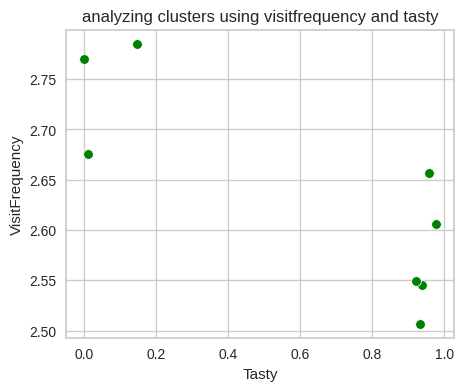

In [104]:
plt.figure(figsize = (5,4))
sns.scatterplot(y = "VisitFrequency", x = "tasty",data=criteria, color="green")
plt.title("analyzing clusters using visitfrequency and tasty")
plt.ylabel("VisitFrequency")
plt.xlabel("Tasty")
plt.show()


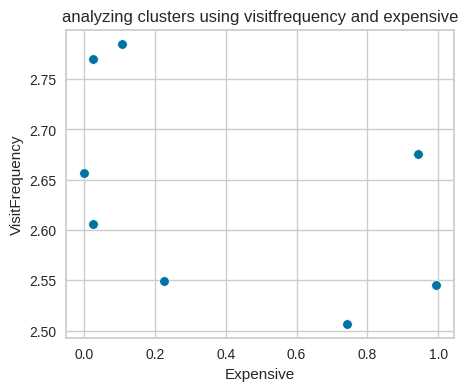

In [105]:
plt.figure(figsize = (5,4))
sns.scatterplot(y = "VisitFrequency", x = "expensive",data=criteria, color="b")
plt.title("analyzing clusters using visitfrequency and expensive")
plt.ylabel("VisitFrequency")
plt.xlabel("Expensive")
plt.show()
